In [2]:
from iCLIP import make_getter
import pandas as pd

# Example 1: iCLIP crosslink reproducbility

Konig *et al* inducued the idea of "reproducibility" that is, if I take all the bases that are crosslinked in one profile with a certain cDNA count, how many of those bases will be crosslinked in another sample. 

This is easy to reproduce with iCLIPlib. The `getter` functions return crosslink counts over specified regions. Below we get all the crosslink counts for Chromosome 1 from an eIF4A3 iCLIP experiment (Hauer *et al*)

In [15]:
replicate1=make_getter(bamfile="eIF4A3-GFP-R1.bam")
replicate2=make_getter(bamfile="eIF4A3-GFP-R2.bam")
rep1_chr1_counts = replicate1(contig="chr1", start=0, end=None)
rep2_chr1_counts = replicate2(contig="chr1", start=0, end=None)

Now define a function to calaculate the reproducbility at a given cDNA count.

In [32]:
def fold_reproducibility(profile1, profile2, fold):
    # Bases in profile1 with a count higher than fold
    thresholded_profile1 = profile1[profile1 >= fold]
    
    # Count these bases
    all_bases = len(thresholded_profile1)
    
    # Count bases also present in profile2
    intersect_bases = \
        sum(thresholded_profile1.index.isin(profile2.index))
        
    return float(intersect_bases)/all_bases    

Now we apply our function to cDNA counts of 1-5.

In [ ]:
reproducibilities = [fold_reproducibility(rep2_chr1_counts,
                                          rep1_chr1_counts,
                                          fold)
                     for fold in range(1,6)]

In [40]:
%load_ext rpy2.ipython
reproducbilities = pd.DataFrame({"count":range(1,6),
                                 "reprod": reproducibilities})

And visualise the results (plotting code not shown) ...

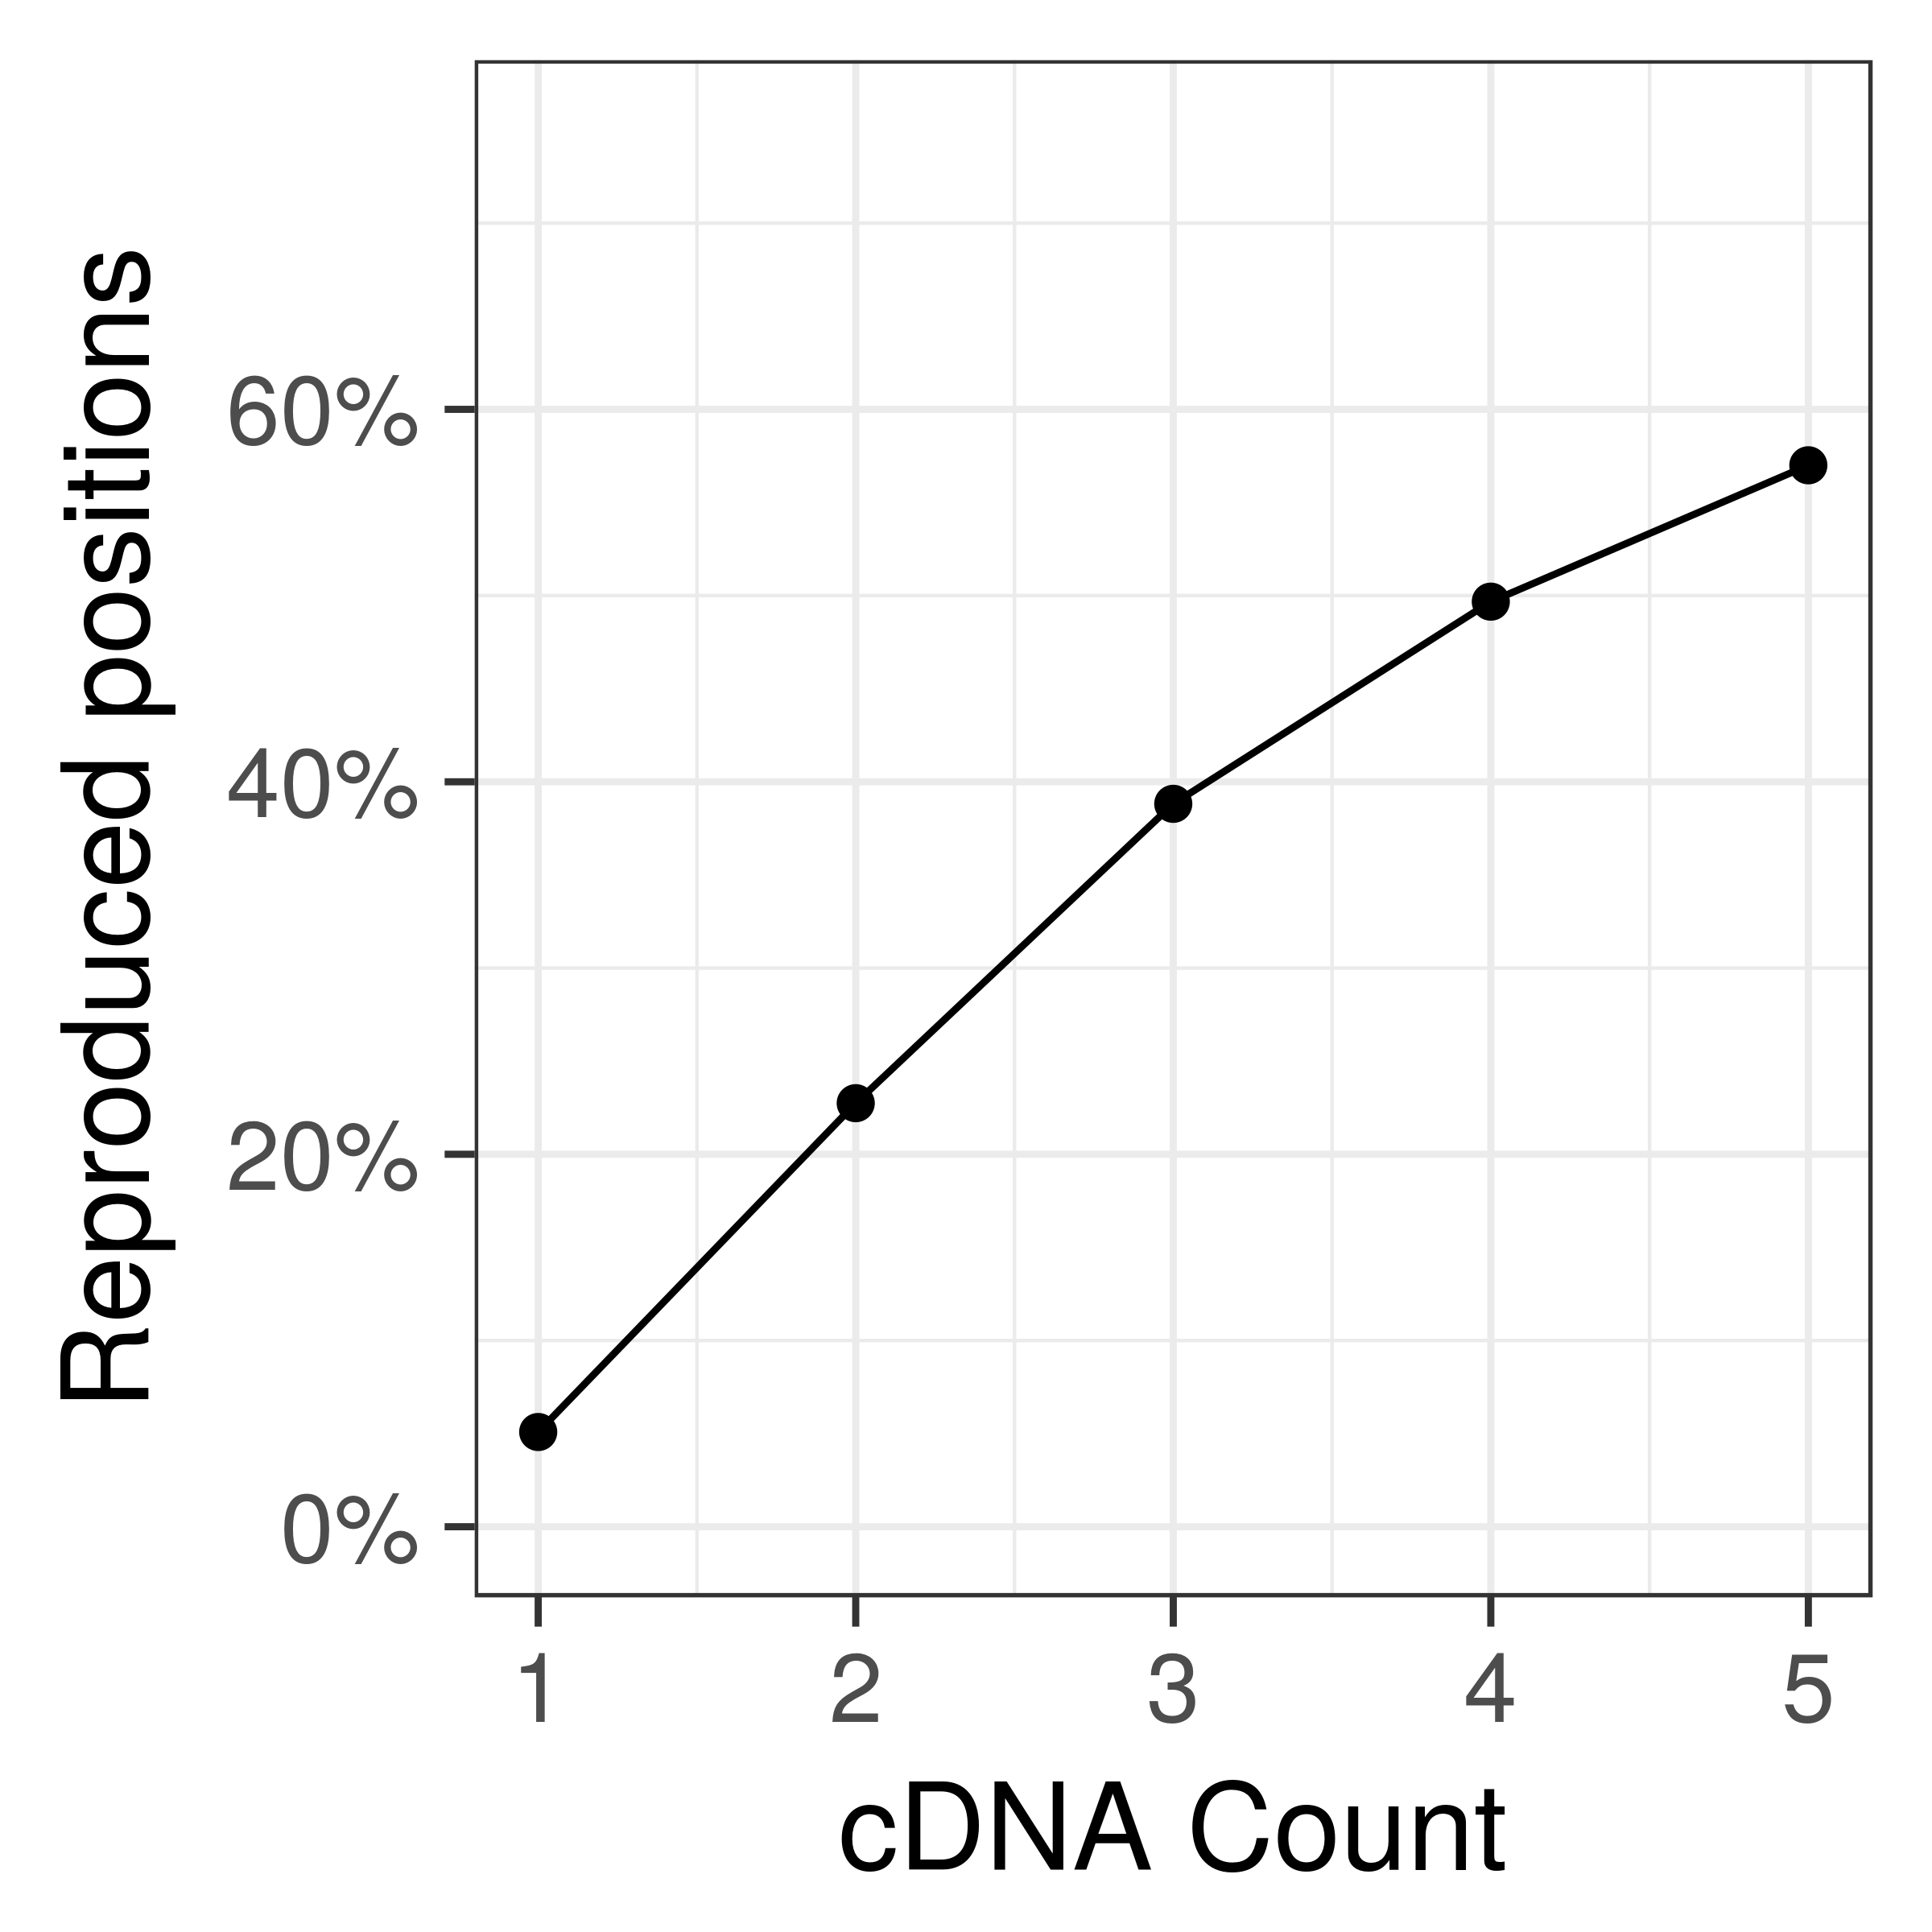

In [46]:
%%R -i reproducbilities -h 4 -w 4 -u in -r 600
library(ggplot2)
ggplot(reproducbilities) + aes(count, reprod) +
    geom_point(size=2) +
    geom_line() +
    theme_bw(base_size=18) +
    xlab("cDNA Count") +
    scale_y_continuous(labels=scales::percent,
                      name="Reproduced positions",
                      limits=c(0,0.75))